thresholding

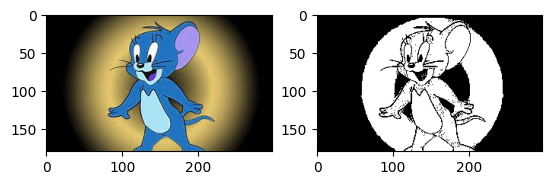

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
d=cv2.imread(r"C:\Users\student\Desktop\dd.jpg")
def th(img, n):
    img_shape = img.shape
    height = img_shape[0]
    width = img_shape[1]
    for row in range(width):
        for column in range(height):
            if img[column, row] > n:
                img[column, row] = 255
            else:
                img[column, row] = 0
    return img

i=cv2.cvtColor(d,cv2.COLOR_BGR2GRAY)
fi=th(i,120)
plt.subplot(121)
plt.imshow(d)
plt.subplot(122)
plt.imshow(fi,cmap='gray')

kmeans

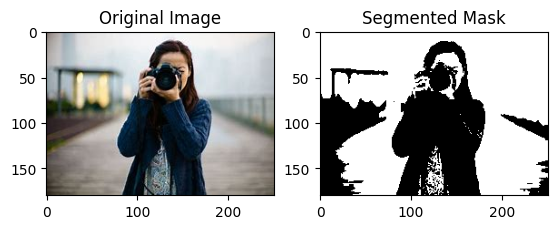

In [53]:
image =cv2.imread(r"C:\Users\student\Desktop\dd.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
(h, w, c) = image.shape
pixels = image.reshape(-1, 3)  
K = 2 
max_iters = 10  
np.random.seed(42)
random_indices = np.random.choice(pixels.shape[0], K, replace=False)
centroids = pixels[random_indices] 
for _ in range(max_iters):
    distances = np.linalg.norm(pixels[:, np.newaxis] - centroids, axis=2)  
    labels = np.argmin(distances, axis=1)
    new_centroids = np.array([pixels[labels == i].mean(axis=0) for i in range(K)])
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids
segmented_image = labels.reshape(h, w)
mask = (segmented_image == 1).astype("uint8") * 255
segmented_output = cv2.bitwise_and(image, image, mask=mask)
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(segmented_image, cmap="gray")
plt.title("Segmented Mask")
plt.show()


meanshift

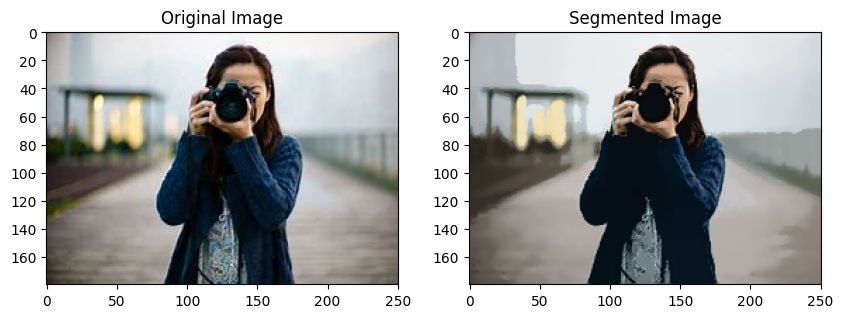

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread(r"C:\Users\student\Desktop\dd.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
segmented_image = cv2.pyrMeanShiftFiltering(image, sp=25, sr=30)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image")
plt.show()


GRAPH CUT

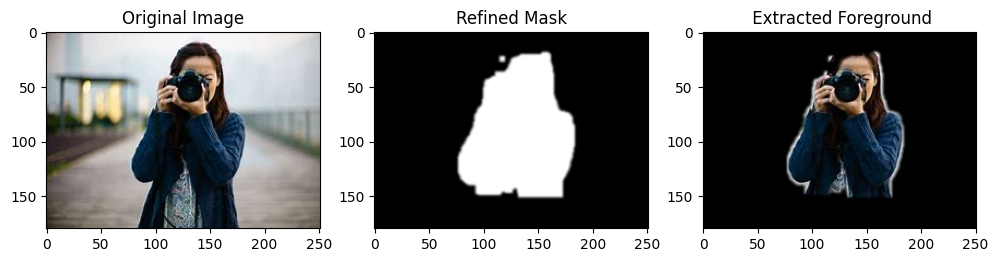

In [83]:
image = cv2.imread(r"C:\Users\student\Desktop\dd.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
mask = np.zeros(image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)
height, width = image.shape[:2]
rect = (40, 20, width - 80, height - 50) 
cv2.grabCut(image, mask, rect, bgdModel, fgdModel, 10, cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
kernel = np.ones((3, 3), np.uint8)
mask2 = cv2.morphologyEx(mask2, cv2.MORPH_CLOSE, kernel, iterations=3) 
mask2 = cv2.dilate(mask2, kernel, iterations=2)  
mask2 = cv2.GaussianBlur(mask2.astype("float32"), (5, 5), 0)
result = image * mask2[:, :, np.newaxis]

plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 3, 2)
plt.imshow(mask2, cmap="gray")
plt.title("Refined Mask")

plt.subplot(1, 3, 3)
plt.imshow(result.astype("uint8"))
plt.title(" Extracted Foreground")
plt.show()


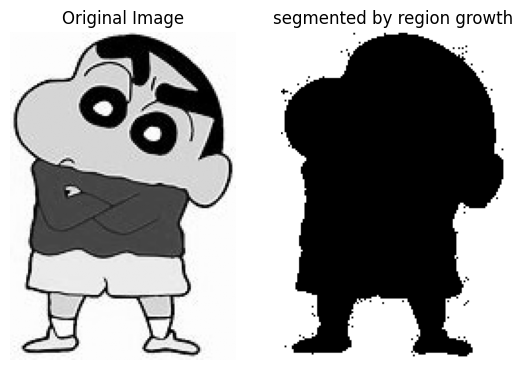

In [85]:
def region(image, seed, threshold):
    rows, cols = image.shape
    segmented_image = np.zeros_like(image)
    segmented_image[seed] = 255
    neighbors = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    to_process = [seed]
    while to_process:
        current_pixel = to_process.pop()
        x, y = current_pixel
        for dx, dy in neighbors:
            nx, ny = x + dx, y + dy
            if 0 <= nx < rows and 0 <= ny < cols:
                if segmented_image[nx, ny] == 0:
                    if abs(int(image[x, y]) - int(image[nx, ny])) <= threshold:
                        segmented_image[nx, ny] = 255
                        to_process.append((nx, ny))
    return segmented_image
d=cv2.imread(r"C:\Users\student\Desktop\d.jpg")
image_gray = cv2.cvtColor(d, cv2.COLOR_BGR2GRAY)
seed = (5, 5)
threshold = 10
segmented_image = region(image_gray, seed, threshold)
plt.subplot(1, 2, 1)
plt.imshow(image_gray, cmap='gray')
plt.title('Original Image')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title("segmented by region growth")
plt.axis("off")
plt.show()